  Kabupaten/Kota  Kelompok Umur - 15-24  Kelompok Umur - 25-34  \
0          Bogor                  18.89                  27.40   
1       Sukabumi                  14.35                  22.75   
2        Cianjur                  18.10                  20.36   
3        Bandung                  18.09                  24.11   
4          Garut                  15.22                  23.02   

   Kelompok Umur - 35-44  Kelompok Umur - 45-54  Kelompok Umur - 55-64  \
0                  24.49                  16.29                   9.08   
1                  22.89                  20.99                  12.16   
2                  22.04                  19.24                  11.75   
3                  23.83                  17.58                  11.07   
4                  21.33                  20.03                  12.30   

   Kelompok Umur - 65+     tanggal  
0                 3.84  2020-01-01  
1                 6.87  2020-01-01  
2                 8.52  2020-01-01  
3         

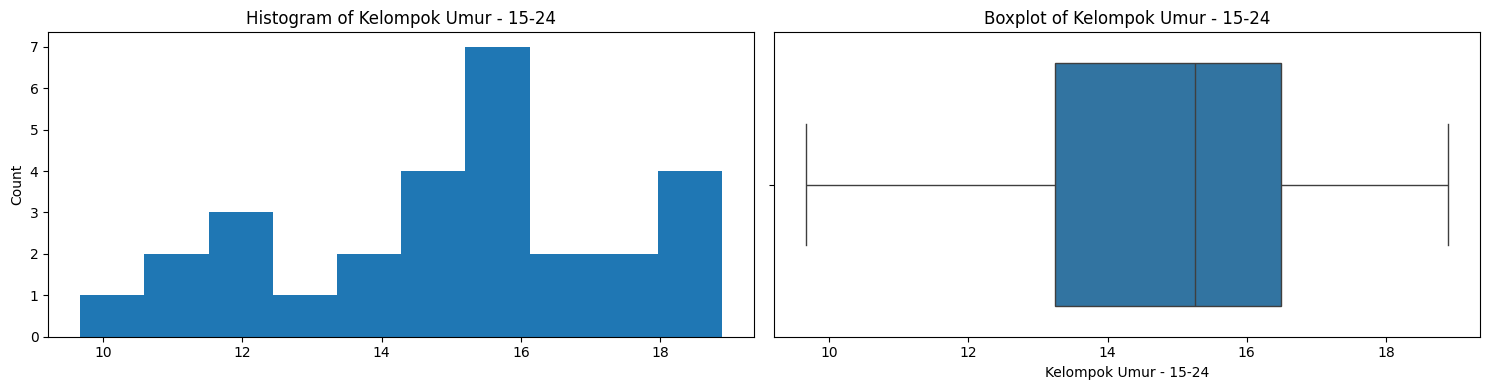

Kelompok Umur - 25-34
Skew: -0.2


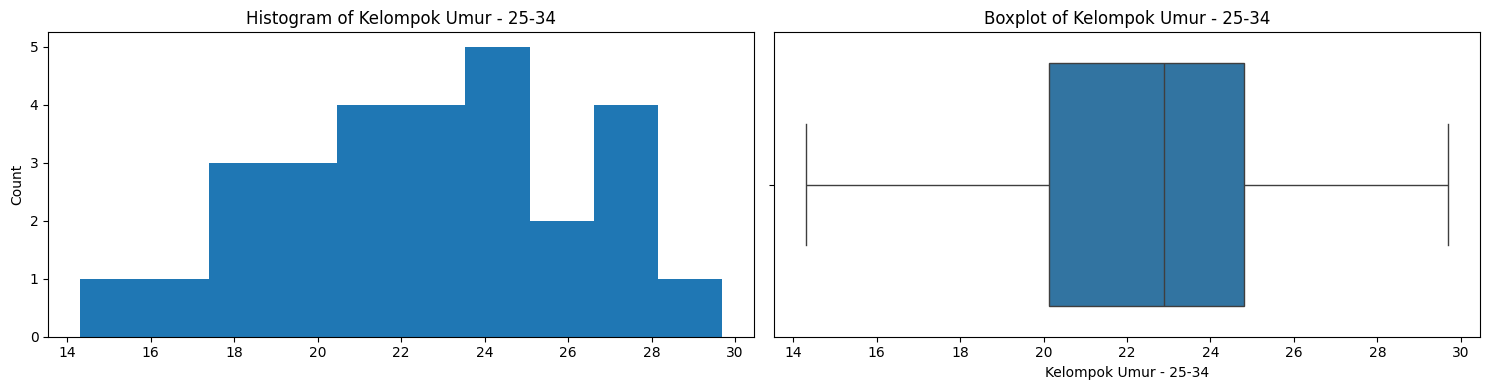

Kelompok Umur - 35-44
Skew: 5.29


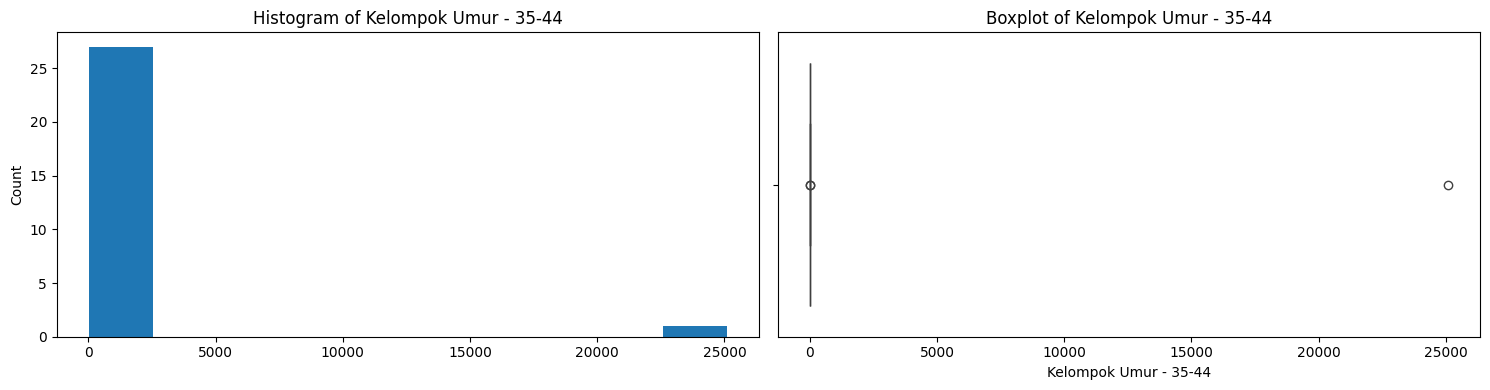

Kelompok Umur - 45-54
Skew: 0.01


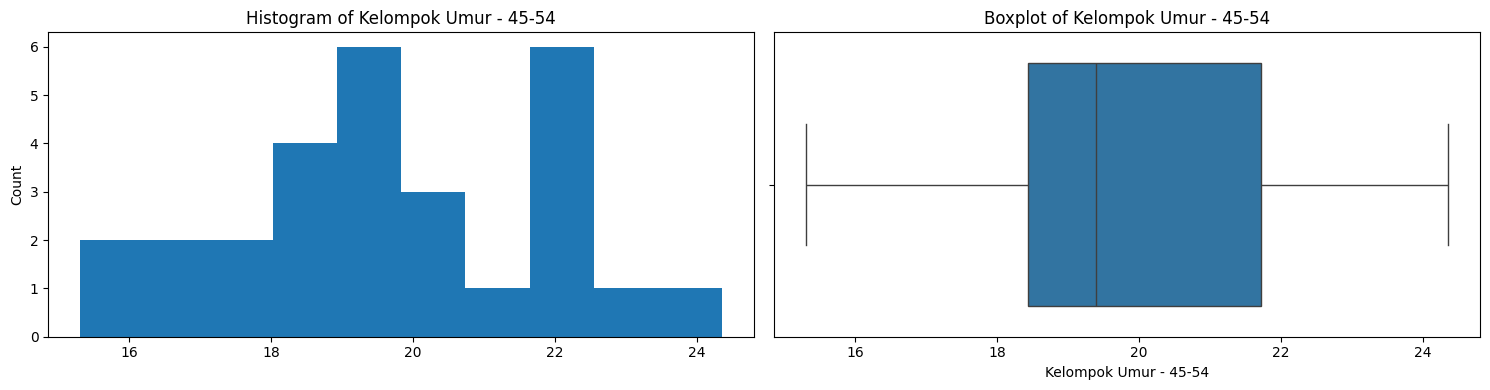

Kelompok Umur - 55-64
Skew: 0.34


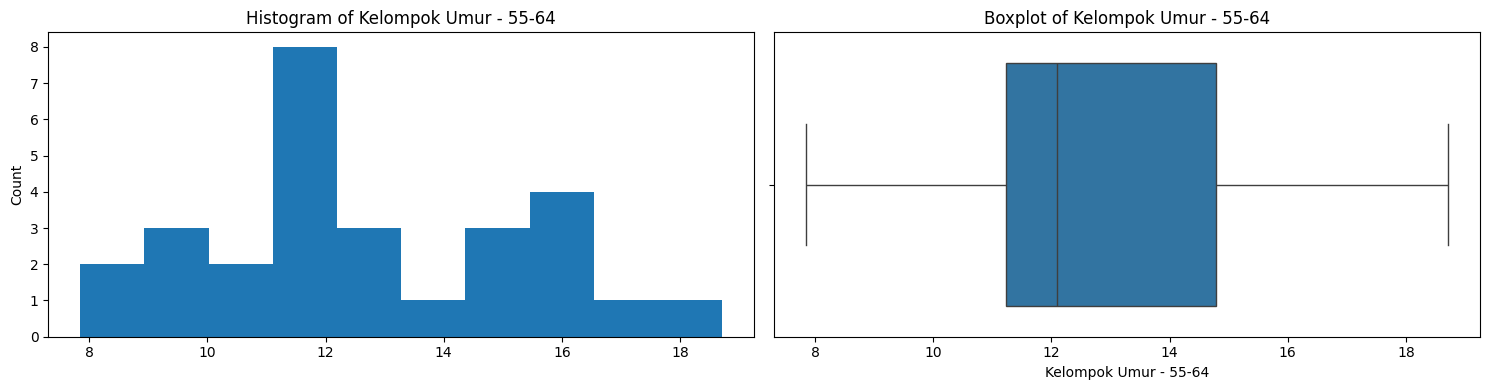

Kelompok Umur - 65+
Skew: 4.4


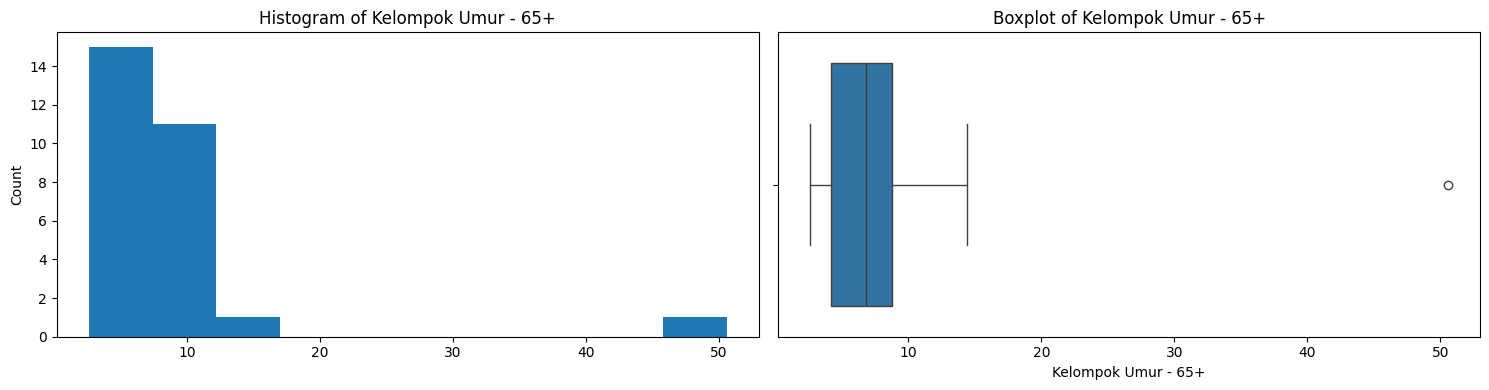

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

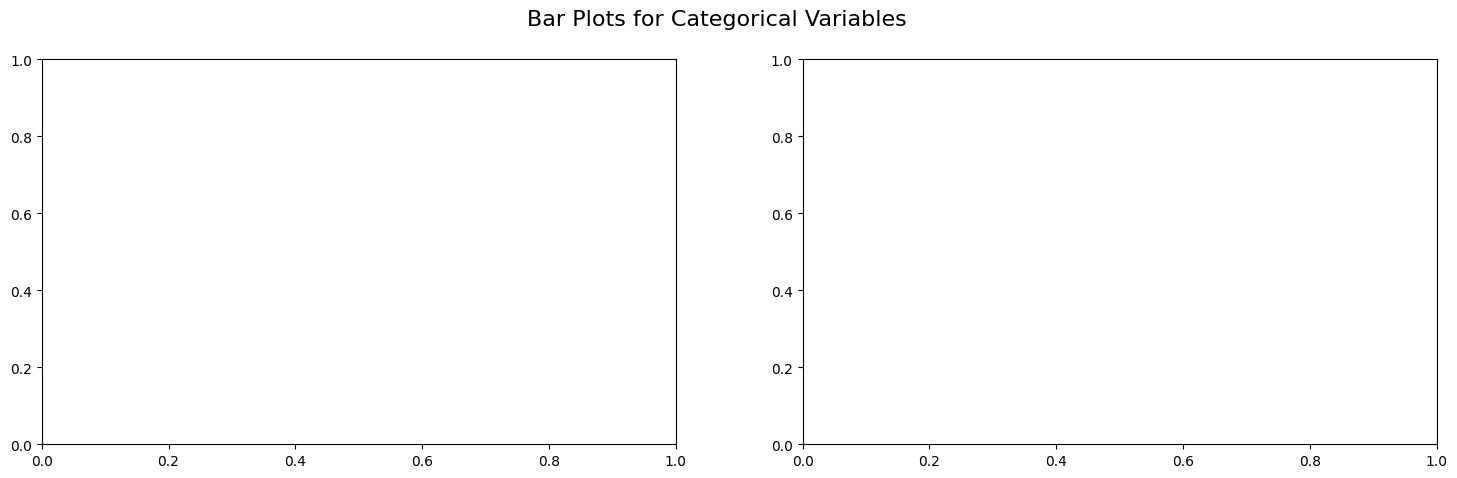

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
data1 = pd.read_csv('data_csv/2020.csv')
# If you have data2, uncomment and merge
# data2 = pd.read_csv('data_csv/data2.csv')
# gabungan = pd.concat([data1, data2], ignore_index=True)

# Show first few rows
print(data1.head())

# Identify categorical and numerical columns
dataobject = data1.select_dtypes(include=["object"]).columns
datanumeric = data1.select_dtypes(include=np.number).columns.tolist()

print("Categorical variables:")
print(dataobject)
print("Numerical variables:")
print(datanumeric)

# Visualize numerical columns
for col in datanumeric:
    print(f"{col}")
    print(f"Skew: {round(data1[col].skew(), 2)}")
    
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    data1[col].hist(grid=False)
    plt.title(f'Histogram of {col}')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data1[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Visualize categorical columns dynamically
cat_cols = dataobject.tolist()
num_plots = len(cat_cols)
nrows = (num_plots + 1) // 2

fig, axes = plt.subplots(nrows, 2, figsize=(18, 5 * nrows))
fig.suptitle('Bar Plots for Categorical Variables', fontsize=16)

# Flatten axes in case of single row
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(ax=axes[i], x=col, data=data1,
                  order=data1[col].value_counts().index, palette='Set2')
    axes[i].tick_params(labelrotation=45)
    axes[i].set_title(f'Countplot of {col}')

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
